Circuit building practice and graphing data. 

In [2]:
#Importing libraries and setting up the Binary_labels function
import random
import matplotlib.pyplot as plt
import numpy as np
import cirq

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
plt.rcParams.update({'font.size': 8})

In [3]:
vec = [1/np.sqrt(2), 1/np.sqrt(2)]
print(cirq.dirac_notation(vec))

0.71|0⟩ + 0.71|1⟩


In [4]:
num_qubits = 4
qubits = cirq.NamedQubit.range(num_qubits, prefix = 'q')
circuit = cirq.Circuit()
circuit.append(cirq.H(qubits[0]))

for i in range(num_qubits - 1):
  circuit.append(cirq.CNOT(qubits[i], qubits[i+1]))

print(circuit)

q0: ───H───@───────────
           │
q1: ───────X───@───────
               │
q2: ───────────X───@───
                   │
q3: ───────────────X───


In [5]:
sv = cirq.final_state_vector(circuit)
print(cirq.dirac_notation(sv))

0.71|0000⟩ + 0.71|1111⟩


Building circuits with X, H, Z, and CNOT gates with measurement results

In [6]:
my_qubits = cirq.NamedQubit.range(3, prefix = "q")
my_circuit = cirq.Circuit()

my_circuit.append(cirq.H(my_qubits[0]))
my_circuit.append(cirq.CNOT(my_qubits[0], my_qubits[1]))

my_circuit.append(cirq.X(my_qubits[2]))
my_circuit.append(cirq.CNOT(my_qubits[0], my_qubits[2]))

In [7]:
for i in range(3):
    my_circuit.append(cirq.measure(my_qubits[i]))

In [8]:
print(my_circuit)

sim = cirq.Simulator()

results = sim.run(my_circuit, repetitions = 100)
print(results)

               ┌──┐
q0: ───H───@────@─────M───
           │    │
q1: ───────X────┼M────────
                │
q2: ───X────────X─────M───
               └──┘
q0=1101100011111110010010011100111101010010101011111110111000100111110001111011111000110010001000010100
q1=1101100011111110010010011100111101010010101011111110111000100111110001111011111000110010001000010100
q2=0010011100000001101101100011000010101101010100000001000111011000001110000100000111001101110111101011


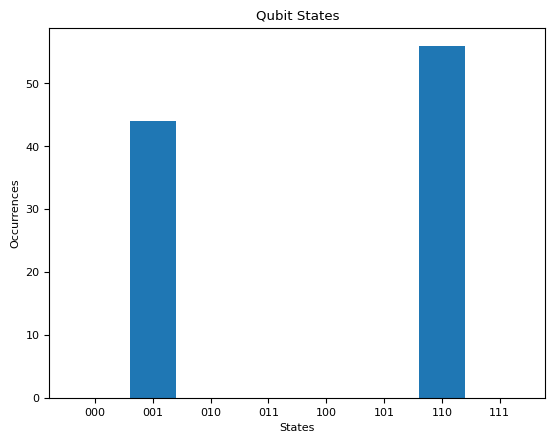

In [9]:
hist = cirq.plot_state_histogram(results, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))

plt.show()

In [18]:
my_qubits = cirq.NamedQubit.range(4, prefix = "q")
my_circuit = cirq.Circuit()

for i in range(4):
    my_circuit.append(cirq.H(my_qubits[i]))
    my_circuit.append(cirq.Z(my_qubits[i]))


In [19]:
for i in range(4):
    my_circuit.append(cirq.measure(my_qubits[i]))

In [13]:
sv = cirq.final_state_vector(my_circuit)
print(cirq.dirac_notation(sv))

0.25|0000⟩ - 0.25|0001⟩ - 0.25|0010⟩ + 0.25|0011⟩ - 0.25|0100⟩ + 0.25|0101⟩ + 0.25|0110⟩ - 0.25|0111⟩ - 0.25|1000⟩ + 0.25|1001⟩ + 0.25|1010⟩ - 0.25|1011⟩ + 0.25|1100⟩ - 0.25|1101⟩ - 0.25|1110⟩ + 0.25|1111⟩


In [22]:
sim = cirq.Simulator()

result = sim.run(my_circuit, repetitions = 100)

print(result)

q0=0001010000100101010111011111111011110000000001001101010000000111011001110110111101101110111011100000
q1=0110010000110100001101110110100000001011011001000011100111101011100101000111110101011011000001001110
q2=0111001110111110010100100010110011000110101100000111101110001101100000111111110010101001001101010111
q3=0011000000000011011001111010101000110011000000111000111001111100000100010110110010011011000000001010


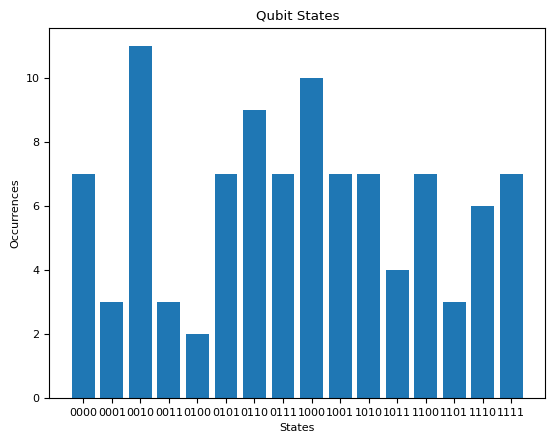

In [23]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(4))

plt.show()

In [24]:
my_qubits = cirq.NamedQubit.range(3, prefix="q")
my_circuit = cirq.Circuit()

for i in range(2):
    my_circuit.append(cirq.H(my_qubits[i]))
my_circuit.append(cirq.CNOT(my_qubits[0], my_qubits[2]))
my_circuit

q0: ───H───@───
           │
q1: ───H───┼───
           │
q2: ───────X───

In [25]:
sv = cirq.final_state_vector(my_circuit)
print(cirq.dirac_notation(sv))

0.5|000⟩ + 0.5|010⟩ + 0.5|101⟩ + 0.5|111⟩


In [26]:
for i in range(2):
    my_circuit.append(cirq.measure(my_qubits[i]))

In [28]:
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions = 100)

print(result)

q0=1011101001111101101011000110011010100001000010101001100001010101010010011010001010011101111111111000
q1=1010100101110110100101100011010010001110000110000011010111110100110111110000101000001101111111101001


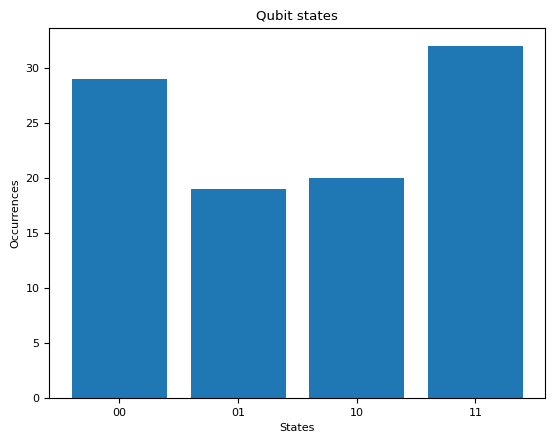

In [30]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = "Qubit states", xlabel = "States", ylabel = "Occurrences", tick_label = binary_labels(2))
plt.show()